In [47]:
from algorithm_ranking import MeasurementsSimulator, MeasurementsVisualizer, MeasurementsManager

In [48]:
from algorithm_ranking import RankVariantsSort1
from algorithm_ranking import RankVariantsSort2
from algorithm_ranking import RankVariantsSort3

In [49]:
import pandas as pd
import numpy as np

### Simulate normal distribution


In [50]:
# class MeasurementsSimulator(MeasurementsManager):
#     def __init__(self, config, distribution='normal'):
#         super().__init__()
#         self.distribution = distribution
#         self.config = config

#     def normal(self, mean, std):
#         return np.random.normal(mean, std)

#     def add_measurement(self, alg, x):
#         try:
#             self.alg_measurements[alg].append(x)
#         except KeyError:
#             self.alg_measurements[alg] = []
#             self.alg_measurements[alg].append(x)

#     def measure(self, rep_steps, run_id):
#         ## Abstract class
#         for alg, params in self.config.items():
#             for i in range(rep_steps):
#                 if self.distribution == 'normal':
#                     x = self.normal(*params)
#                     self.add_measurement(alg, x)

#     def get_alg_measurements(self):
#         ## abstract class
#         return self.alg_measurements



Specify the mean and standard deviation for each algorithm

In [51]:
cfg = {}
cfg['alg1']  = [0.2,0.02] # [mean, std]
cfg['alg2']  = [0.2,0.01]
cfg['alg3']  = [0.2,0.01]
cfg['alg4']  = [0.19,0.01]
ms = MeasurementsSimulator(cfg, 'normal',seed=129)    

In [52]:
rep_steps = 20
run_id= 1
ms.measure(rep_steps=rep_steps, run_id=run_id)

In [53]:
alg_measurements = ms.get_alg_measurements()
h0 = list(cfg.keys())

#### Inputs:

In [54]:
alg_measurements

{'alg1': [0.16742377244124623,
  0.20991478401686695,
  0.18474467129451336,
  0.20386929576771917,
  0.20031907574940178,
  0.20924960445120588,
  0.1947172245677086,
  0.17634791367772978,
  0.1873460027396401,
  0.18933982322487167,
  0.19242946181859338,
  0.2168191191403227,
  0.19657656127313458,
  0.2277554731720521,
  0.22987160799130832,
  0.1751428697000507,
  0.17541546226180152,
  0.1956845087739557,
  0.22918646232635131,
  0.19921181209865746],
 'alg2': [0.1971327993427625,
  0.1947449837447297,
  0.21237065074399045,
  0.19587092292960853,
  0.1962559748282678,
  0.18967430746992617,
  0.20128547157022622,
  0.20597724132827364,
  0.19128543435465828,
  0.20690852777541954,
  0.19221002419707256,
  0.19651334539253054,
  0.19469357970594117,
  0.19404071421380864,
  0.19127613695684534,
  0.2061549718520971,
  0.2022338709354601,
  0.19449286898509235,
  0.19668683598234826,
  0.1811768901912799],
 'alg3': [0.19907386811336988,
  0.18419643929335683,
  0.197333469914343,

In [55]:
h0

['alg1', 'alg2', 'alg3', 'alg4']

### Visualize data

In [56]:
mv = MeasurementsVisualizer(alg_measurements, h0)

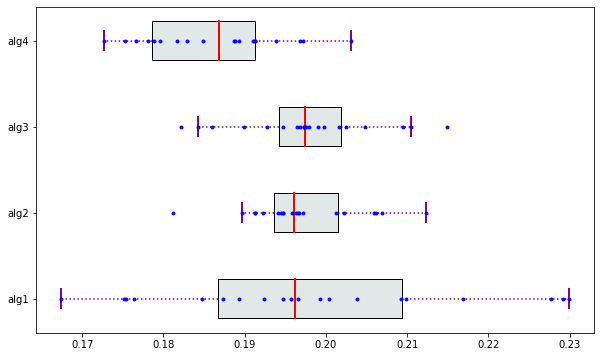

In [57]:
fig = mv.show_measurements_boxplots()

/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


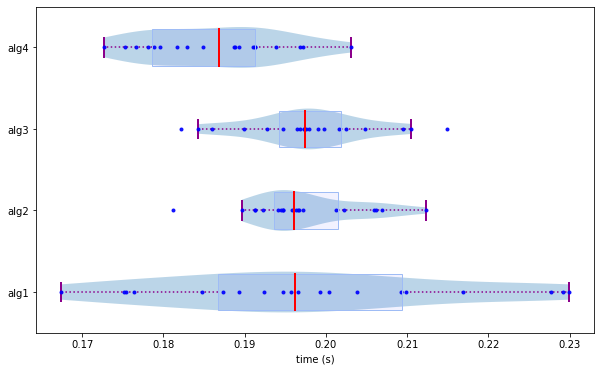

In [58]:
fig = mv.show_measurements_violinplot()

### Algorithm ranking

In [59]:
rank_variants = RankVariantsSort2(alg_measurements,h0)

In [60]:
rank_variants.rank_variants(debug=True)

['alg1', 'alg2', 'alg3', 'alg4']
[0 1 2 3]


compare alg1 and alg2
['alg1', 'alg2', 'alg3', 'alg4']
[0 0 1 2]


compare alg2 and alg3
['alg1', 'alg2', 'alg3', 'alg4']
[0 0 0 1]


compare alg4 and alg3
['alg1', 'alg2', 'alg4', 'alg3']
[0 0 0 1]


compare alg1 and alg2
['alg1', 'alg2', 'alg4', 'alg3']
[0 0 0 1]


compare alg4 and alg2
['alg1', 'alg4', 'alg2', 'alg3']
[0 0 1 1]


compare alg1 and alg4
['alg1', 'alg4', 'alg2', 'alg3']
[0 0 1 1]




,case:concept:name,case:rank:q75-q25
0,alg1,0
1,alg4,0
2,alg2,1
3,alg3,1


In [61]:
s, mr = rank_variants.calculate_mean_rank()

In [62]:
s

,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q55-q45
case:concept:name,,,,,,,,
alg1,0,0,0,0,0,0,1,1
alg2,0,0,0,1,1,1,1,1
alg3,0,0,0,1,1,1,1,2
alg4,0,0,0,0,0,0,0,0


In [63]:
mr

,case:concept:name,case:mean-rank
3,alg4,0.000
0,alg1,0.250
1,alg2,0.625
2,alg3,0.750
